<a href="https://colab.research.google.com/github/nambiar/MachineLearning/blob/master/Session6/Assignment6a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

Using TensorFlow backend.


cifar contains 10 classses ,classes are completely mutually exclusive. There is no overlap between automobiles and trucks.

In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
print (test_features.shape)
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 9s 0us/step
(10000, 32, 32, 3)


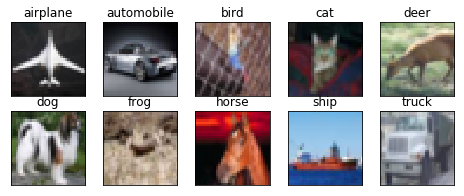

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [7]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
print('Original label:', test_labels[0])
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

print('After conversion to one-hot:', test_labels[0])
print(train_features.shape)


imagenormalize = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
imagenormalize.fit(train_features)
#print('Data Generator mean=%.3f, std=%.3f' % (imagenormalize.mean, imagenormalize.std))
#iterators for using the normalisation on all the images in test and train datasets with epoch's
X_train_iterator = imagenormalize.flow(train_features, train_labels, batch_size=64)
X_test_iterator = imagenormalize.flow(test_features, test_labels, batch_size=64)



Original label: [3]
After conversion to one-hot: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(50000, 32, 32, 3)


Validation accuracy received is 0.8211 for the previous model for 100 epoch's


1.   Class uderstanding Using a architecture with bottleneck, same channels till the bottleneck
2.   Without dropout and only image normalisation for 40 epoch 0.5926 is the accuracy
3.   Adding l2 regularisation we get 0.7475  for 40 epoch
4.   Adding dropout increases to 0.7575 with 0.01  for 40 epoch
5.   Addingbatch normalisation makes to 7909  for 40 epoch
6.   Making architectural changes to existing architecture gives 0.8082 for 40 epoch's
7.   Getting an acuuracy for 0.8186 for 50 epoch's
8.   Getting an accuracy of 0.8270 for 50 epoch's/0.8312 for 50 epoch's
9. Getting an accuracy of  0.8373 for 50 epoch 's using bottleneck approach'




In [13]:
# Define the model
model = Sequential()

#32*32*3 (*)(3*3*3)*32  = 32*32*32 
model.add(Convolution2D(32, 3, 3, activation='relu',border_mode='same', input_shape=(32, 32, 3),kernel_regularizer=regularizers.l2(0.00001))) #32 #3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3,activation='relu',border_mode='same',kernel_regularizer=regularizers.l2(0.00001))) #32 #5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3,activation='relu',border_mode='same',kernel_regularizer=regularizers.l2(0.00001))) #32 #7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2))) #16 #14


model.add(Convolution2D(32, 3, 3, activation='relu',border_mode='same',kernel_regularizer=regularizers.l2(0.00001))) #16 #16
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3,activation='relu',border_mode='same',kernel_regularizer=regularizers.l2(0.00001))) #16 #18
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3,activation='relu',border_mode='same',kernel_regularizer=regularizers.l2(0.00001))) #16 #18
model.add(BatchNormalization())
model.add(Dropout(0.1))

#16 -> 8
model.add(MaxPooling2D(pool_size=(2, 2)))#8 #36 actually ask regarding these
model.add(Convolution2D(10, 8,8,activation='relu',kernel_regularizer=regularizers.l2(0.00001))) #4 #36
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3..., kernel_regularizer=<keras.reg..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", kernel_regularizer=<keras.reg..., padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_la

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_15 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_16 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 128)       73856     
__________

Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
782/782 [==============================] - 32s 41ms/step - loss: 1.3657 - acc: 0.5392 - val_loss: 1.0210 - val_acc: 0.6717
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0007581501.
782/782 [==============================] - 29s 36ms/step - loss: 1.0073 - acc: 0.6659 - val_loss: 0.8999 - val_acc: 0.7212
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0006105006.
782/782 [==============================] - 28s 36ms/step - loss: 0.8682 - acc: 0.7148 - val_loss: 0.7513 - val_acc: 0.7650
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0005109862.
782/782 [==============================] - 29s 36ms/step - loss: 0.7666 - acc: 0.7520 - val_loss: 0.6984 - val_acc: 0.7858
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0004393673.
782/782 [==============================] - 28s 36ms/step - loss: 0.7018 - acc: 0.7721

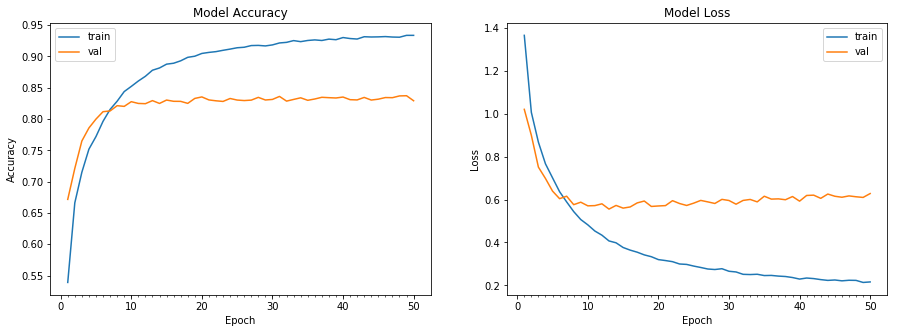

Accuracy on test data is: 37.61


In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.001 * 1/(1 + 0.319 * epoch), 10)

#datagen = ImageDataGenerator(zoom_range=0.0, 
                            # horizontal_flip=False)


# train the model
start = time.time()
# Train the model
#model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
#                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100,validation_data=(X_test_iterator),validation_steps=len(X_test_iterator),
#                                  verbose=1)
model_info = model.fit_generator(X_train_iterator, steps_per_epoch=len(X_train_iterator), epochs=50, verbose=1, validation_data=(X_test_iterator),validation_steps=len(X_test_iterator),callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))